# 讀取濕地水質資料

In [1]:
import pandas as pd
import requests

In [2]:
wname = "茄萣濕地"

In [3]:
url = f"https://wetland-db.tcd.gov.tw/wlfea/RESTful/OpenAPI/GetWaterData?wname={wname}&limit=1000"

In [5]:
data = requests.get(url).json()

In [6]:
data[0]

{'BOD': '6.6',
 'COD': '15',
 'EVENTDATE': '20160301',
 'EVENTTIME': 'NA',
 'Investigator': 'NA',
 'LATITUDE': '22.883555',
 'LONGITUDE': '120.202',
 'NH3_N': '0.1',
 'NO3_N': '0',
 'SS': '9.5',
 'S_NAME': 'A32',
 'T_P': '6',
 'Temp': '25.4',
 'pH': '8.2'}

In [7]:
data1 = {}

for i, x in enumerate(data):
  data1[i] = pd.Series(x)

In [8]:
data1[0]

S_NAME                A32
EVENTDATE        20160301
EVENTTIME              NA
LONGITUDE         120.202
LATITUDE        22.883555
Temp                 25.4
pH                    8.2
NH3_N                 0.1
SS                    9.5
BOD                   6.6
COD                    15
NO3_N                   0
T_P                     6
Investigator           NA
dtype: object

In [9]:
df1 = pd.DataFrame(data1)

In [11]:
df1 = df1.T

In [12]:
df1.head()

,S_NAME,EVENTDATE,EVENTTIME,LONGITUDE,LATITUDE,Temp,pH,NH3_N,SS,BOD,COD,NO3_N,T_P,Investigator
0,A32,20160301,NA,120.202,22.883555,25.4,8.2,0.1,9.5,6.6,15,0,6,NA
1,A32,20160501,NA,120.202,22.883555,29.8,9.02,0.21,2,1.7,59,0,0.48,NA
2,A32,20160801,NA,120.202,22.883555,31.8,9.35,0.14,8,4.71,36,0.01,0.35,NA
3,A32,20161001,NA,120.202,22.883555,30.1,8.92,0.13,4,6.21,12,0.01,0.29,NA
4,A31,20160301,NA,120.19713,22.890361,27.6,8.7,0.1,0.1,15.8,18,0.3,3,NA


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 0 to 80
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   S_NAME        81 non-null     object
 1   EVENTDATE     81 non-null     object
 2   EVENTTIME     81 non-null     object
 3   LONGITUDE     81 non-null     object
 4   LATITUDE      81 non-null     object
 5   Temp          81 non-null     object
 6   pH            81 non-null     object
 7   NH3_N         81 non-null     object
 8   SS            81 non-null     object
 9   BOD           81 non-null     object
 10  COD           81 non-null     object
 11  NO3_N         81 non-null     object
 12  T_P           81 non-null     object
 13  Investigator  81 non-null     object
dtypes: object(14)
memory usage: 12.0+ KB


In [15]:
df1['EVENTDATE'] = pd.to_datetime(df1['EVENTDATE'])

In [16]:
df1.head()

,S_NAME,EVENTDATE,EVENTTIME,LONGITUDE,LATITUDE,Temp,pH,NH3_N,SS,BOD,COD,NO3_N,T_P,Investigator
0,A32,2016-03-01,NA,120.202,22.883555,25.4,8.2,0.1,9.5,6.6,15,0,6,NA
1,A32,2016-05-01,NA,120.202,22.883555,29.8,9.02,0.21,2,1.7,59,0,0.48,NA
2,A32,2016-08-01,NA,120.202,22.883555,31.8,9.35,0.14,8,4.71,36,0.01,0.35,NA
3,A32,2016-10-01,NA,120.202,22.883555,30.1,8.92,0.13,4,6.21,12,0.01,0.29,NA
4,A31,2016-03-01,NA,120.19713,22.890361,27.6,8.7,0.1,0.1,15.8,18,0.3,3,NA


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 0 to 80
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   S_NAME        81 non-null     object        
 1   EVENTDATE     81 non-null     datetime64[ns]
 2   EVENTTIME     81 non-null     object        
 3   LONGITUDE     81 non-null     object        
 4   LATITUDE      81 non-null     object        
 5   Temp          81 non-null     object        
 6   pH            81 non-null     object        
 7   NH3_N         81 non-null     object        
 8   SS            81 non-null     object        
 9   BOD           81 non-null     object        
 10  COD           81 non-null     object        
 11  NO3_N         81 non-null     object        
 12  T_P           81 non-null     object        
 13  Investigator  81 non-null     object        
dtypes: datetime64[ns](1), object(13)
memory usage: 12.0+ KB


In [18]:
df1 = df1.set_index("EVENTDATE")

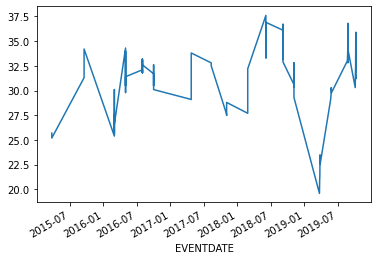

In [19]:
df1['Temp'].astype(float).plot()

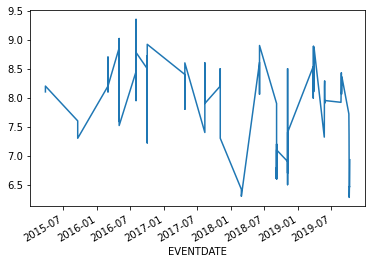

In [20]:
df1['pH'].astype(float).plot()